# MODELAGEM

# APRENDIZADO ESTATÍSTICO

O termos Aprendizado Estatístico refere-se a uma vasta quantidade de ferramentas que são utilizadas para entender dados. 

Essas ferramentas são classificadas em **supervisionadas** e **não-supervisionadas**. 

De forma geral, **aprendizado supervisionado** envolve a construção de um modelo estatístico para prever ou estimar uma resposta de acordo com uma ou mais informações de entrada. 

No **aprendizado não-supervisionado** existem variáveis de entrada mas não existe uma variável resposta. Neste caso, o objetivo é entender a estrutura e a relação entre as variáveis. 

Existe uma terceira classificação para as ferramentas de aprendizado estatístico chamada Reinforcement Learning, mas não abordaremos este tema neste curso.

# EXEMPLO 1

Um estudo estatístico cujo objetivo é estimar a probabilidade de uma transação ser uma fraude e são fornecidos dados relativos a transações passadas bem como se estas foram uma fraude ou não. 
É considerado um estudo de **aprendizado supervisionado**.

# EXEMPLO 2

Um estudo em que são fornecidas diversas informações sobre os hábitos de compras dos clientes e deseja-se identificar diferentes segmentos, é um estudo de **aprendizado não-supervisionado**.

Vamos abordar inicialmente algumas técnicas de aprendizado supervisionado. 

Em seguida abordaremos superficialmente alguns conceitos de aprendizado não-supervisionado. Todos esses conceitos serão apresentados com exemplos práticos usando o R.

Um material introdutório interessante pode ser verificado [neste link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

# APRENDIZADO SUPERVISIONADO

Em aprendizado supervisionado é necessário em primeiro lugar definir qual é a sua variável resposta ou variável dependente (Frequentemente chamada de $Y$ ou $y$). 

Deve-se tomar muito cuidado ao definí-la para que o modelo responda exatamente o que você está querendo saber.

# APRENDIZADO SUPERVISIONADO

A variável resposta pode ser a quantidade de compras que um cliente fará no próximo mês, o preço do aluguel de uma casa, uma variável binária indicando se um cliente não pagará a fatura no próximo mês. 

Existem variáveis resposta que não são preditivas também, por exemplo: dada uma imagem de um número escrito a mão, qual número está escrito nela. Veja um exemplo onlie [aqui](http://myselph.de/neuralNet.html)

# APRENDIZADO SUPERVISIONADO

Em seguida, definimos quais serão as informações que auxiliarão a prever essa variável resposta. Essas variáveis são chamadas de variáveis explicativas, variáveis independentes ou simplesmente $X$.

Para a quantidade de compras que um cliente fará no próximo mês essas variáveis podem ser quantidade de compras que o cliente fez neste mês, o gasto que ele teve neste mês, quantas vezes ele frequentou a minha loja no último ano, etc.

# APRENDIZADO SUPERVISIONADO

Um vetor da forma $( Y, X_1, X_2, X_3, ..., X_p)$ representa uma observação. 

Para usar qualquer algoritmo de aprendizado de máquina, você precisará de um número suficiente de observações. 

O número de observações vai depender da complexidade do algoritmo que você quiser utilizar, da disponibilidade de observações entre outros motivos.

# APRENDIZADO SUPERVISIONADO

De uma forma um pouco mais formal, podemos explciar o Aprendizado Supervisionado da seguinte forma. Suponha que você observou uma variável resposta $Y$ e $p$ diferentes variáveis explicativas $( X_1, X_2, X_3, ..., X_p)$. 

Assumimos que existe alguma relação entre $Y$ e $X = ( X_1, X_2, X_3, ..., X_p)$. 

Podemos denotar matematicamente esta relação como na seguinte equação:
$$
Y = f(X) + \xi

O objetivo geral do aprendizado supervisionado é estimar a função $f$. Nessa formulação, $\xi$ é um termo de erro aleatório com média 0. Já $f$ representa a informação sistemática que $X$ fornece sobre $Y$.

# APRENDIZADO SUPERVISIONADO
Existem diversas maneiras de estimar essa função. Em alguns casos assumimos uma forma paramétrica para ela, em outros não. Alguns exemplos de algoritmos são:
- Regressão Linear
- Regressão Logística
- Árvore de Decisão
- Florestas Aleatórias (Random Forest)
- Gradient Boosting
- Redes Neurais
- Etc.
Cada um dos algoritmos possui as suas vantagens e desvantagens, e problemas em que trazem melhores resultados ou não.

# REGRESSÃO LINEAR
Na introdução ao aprendizado supervisionado, vimos que o objetivo é sempre estimar uma função $f$  tal que

$$
y = f(x)+\xi.
$$

O modelo linear assume que a função $f$  é uma função linear de modo que a formulação do apredizado supervisionado pode ser reescrita da seguinte forma:

$$
Y = \alpha + X\beta + \xi
Em que $\alpha$ e $\beta$ são coeficientes que serão estimados. 

Esses valores são calculados de forma a minimizar uma função de perda na sua amostra. 

A função mais utilizada é a perda quadrática na sua amostra. Considere $(y_1,x_1),(y_2,x_2),...,(y_n,x_n)$ para uma amostra de tamanho $n$.
$\alpha$ e $\beta$ são escolhidos de tal forma que:

$$
\sum_{i=1}^{n}= \left | y_{i}-(\alpha + \beta x_{i}) \right |^{2}
$$

seja o menor possível. Isto é, estamos minimizando o erro quadrático.

# REGRESSÃO LINEAR

Na ótica da estatística, assumimos também que $Y\sim Normal(\alpha + \beta, \sigma^2)$  escolhemos $\alpha$ e $\beta$ de forma que maximize uma função que chamamos de verossimilhança. 

Essa suposição é útil quando queremos fazer testes de hipóteses e intervalos de confiança. 

Por enquanto, não estamos interessados nisso e portanto vamos apresentar uma visão menos complexa.

# EXEMPLO
Considere o banco de dados BodyFat obtido [neste link](http://lib.stat.cmu.edu/datasets/bodyfat) Esses são dados do percentual de gordura corporal em uma amostra de 252 homens junto com diversas outras medidas corporais. O percentual de gordura corporal é medido pesando a pessoa sob a água, um procedimento trabalhoso. O objetivo é fazer um modelo linear que permita obter o percentual de gordura usando medidas do corpo fáceis de serem obtidas. Os dados são do site do Journal of Statistics Education.

In [80]:
library(readxl)
library(dplyr)
library(ggplot2)
bodyfat <- read_excel('data/body_fat.xlsx')

In [81]:
head(bodyfat)

Individuo,Densidade,Body_Fat,Idade,Peso,Altura,Pescoço,Torax,Abdomen,Quadril,Coxa,Joelho,Tornozelo,Biceps,Antebraço,Pulso
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,1.0512,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


# Detalhes das variáveis:
- Densidade: determinada pela pesagem subaquática
- %Body Fat: Porcentagem de gordura corporal da equação de Siri (1956)
- Idade (Anos)
- Peso (libras)
- Polegadas de altura)
- Circunferência do pescoço (cm)
- Circunferência torácica (cm)
- Circunferência do abdômen 2 (cm)
- Circunferência do quadril (cm)
- Circunferência da coxa (cm)
- Circunferência do joelho (cm)
- Circunferência do tornozelo (cm)
- Circunferência do bíceps (estendido) (cm)
- Circunferência do antebraço (cm)
- Circunferência do pulso (cm)

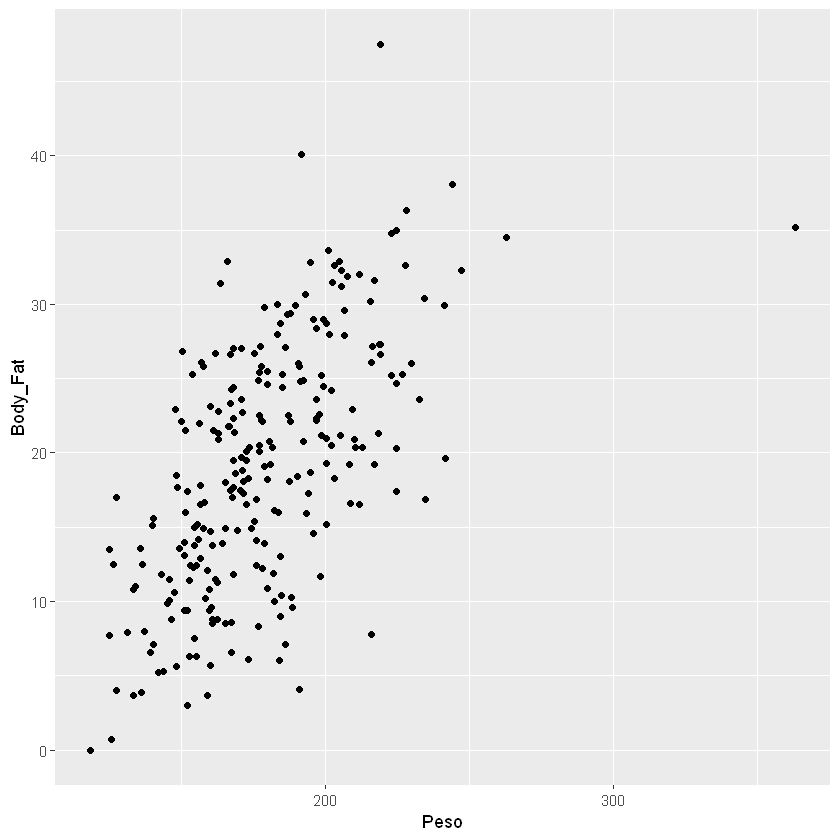

In [9]:
ggplot(bodyfat, aes(x = Peso, y = Body_Fat)) + geom_point()

# EXEMPLO REGRESSÃO

A partir do gráfico de dispersão, vemos que o peso do indivíduo parece ser linearmente relacionado ao percentual de gordura corporal. 

Vamos então ajustar um modelo linear usando o R. 

Para ajustar o modelo, usamos a função lm (de *__l__inear __m__odel*). 

A função lm, assim como muitas outras que ajustam modelo no R, recebe como argumentos uma formula e um banco de dados.

# EXEMPLO REGRESSÃO

`**formula**` é um tipo especial de objeto no R que ajuda muito na especificação dos modelos. Ela tem a forma `y ~ x1 + x2 + ... + xn` em que y é o nome da variável resposta e x1, x2, …, xn são os nomes das variáveis que serão utilizadas como explicativas.

# EXEMPLO REGRESSÃO

In [82]:
ajuste <- lm(Body_Fat ~ Peso, data = bodyfat)

# Visualizando o que acontece no ajuste do modelo

<img src=https://miro.medium.com/max/875/1*NoA9oBREXdwkwa-3a-KTTA.gif width="500">

# EXEMPLO REGRESSÃO

Com essa chamada da função criamos o objeto ajuste. Esse objeto abriga informações relacionadas ao ajuste do modelo.
$$
bodyfat = \alpha + \beta \times Peso + \xi
$$
As estimativas de $\alpha$ e $\beta$ podem ser encontradas usando a função `summary`. 

A estimativa de $\alpha$ é o valor da coluna Estimate na linha (Intercept): -12.12634 e a estimativa de $\beta$ é o valor logo abaixo: 0.17485.

# Aplicando `_summary_`

In [83]:
summary(ajuste)


Call:
lm(formula = Body_Fat ~ Peso, data = bodyfat)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.8409  -4.7440   0.0656   4.9099  21.3345 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.12634    2.58481  -4.691 4.47e-06 ***
Peso          0.17485    0.01426  12.265  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.638 on 250 degrees of freedom
Multiple R-squared:  0.3757,	Adjusted R-squared:  0.3732 
F-statistic: 150.4 on 1 and 250 DF,  p-value: < 2.2e-16


Em R, o ajuste de um modelo estatístico é salvo em um objeto. Esse objeto é uma list que armazena diversas informações sobre o ajuste. Você pode ver algumas informações disponíveis quando vê a estrutura do objeto ajuste usando a função str.

In [84]:
str(ajuste, max.level = 1)

List of 12
 $ coefficients : Named num [1:2] -12.126 0.175
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "Peso"
 $ residuals    : Named num [1:252] -2.54 -12.07 10.5 -9.78 8.61 ...
  ..- attr(*, "names")= chr [1:252] "1" "2" "3" "4" ...
 $ effects      : Named num [1:252] -304.13 81.41 11.25 -9.81 8.59 ...
  ..- attr(*, "names")= chr [1:252] "(Intercept)" "Peso" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:252] 14.8 18.2 14.8 20.2 20.1 ...
  ..- attr(*, "names")= chr [1:252] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 250
 $ xlevels      : Named list()
 $ call         : language lm(formula = Body_Fat ~ Peso, data = bodyfat)
 $ terms        :Classes 'terms', 'formula'  language Body_Fat ~ Peso
  .. ..- attr(*, "variables")= language list(Body_Fat, Peso)
  .. ..- attr(*, "factors")= int [1:2, 1] 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. ..- attr(*, "term.labels")= chr 

Por exemplo você pode acessar os coeficientes do modelo usando `ajuste$coefficients`.

Outra função que existe para a maior parte dos modelos que podem ser ajustados usando o R a predict. Usamos a função predict para obter as estimativas do modelo ajustado para uma base de dados (nova ou não).

In [85]:
bodyfat$predito_modelo1 <- predict(ajuste, newdata = bodyfat)
bodyfat %>% select(Peso, Body_Fat, predito_modelo1) %>% head()

Peso,Body_Fat,predito_modelo1
<dbl>,<dbl>,<dbl>
154.25,12.3,14.84405
173.25,6.1,18.16617
154.00,25.3,14.80034
184.75,10.4,20.17693
184.25,28.7,20.08951
210.25,20.9,24.63557


Nessa tabela, vemos o valor predito pelo modelo para cada observação bem como o valor verdadeiro de gordura corporal daquele indivíduo. Nosso modelo não parece estar muito bom. 
Uma possível medida de erro é o MSE (Erro quadrático médio). 
Podemos calculá-lo fazendo contas simples no R.

In [86]:
mse <- mean((bodyfat$Body_Fat - bodyfat$predito_modelo1)^2)
mse

[1] 43.71068

É mais fácil identificar se esse erro é baixo ou não comparando-o com o erro se usássemos a média da variável como valor predito para todas as observações e tirando a raíz quadrada dos dois.

In [87]:
erro_usando_media <- mean((bodyfat$Body_Fat - mean(bodyfat$Body_Fat))^2)
erro_usando_media

[1] 70.01164

In [88]:
sqrt(mse)

[1] 6.611405

In [89]:
sqrt(erro_usando_media)

[1] 8.367296

In [90]:
bodyfat$media <- mean(bodyfat$Body_Fat)

Agora podemos ter uma ideia de que o nosso erro está alto. Se usássemos apenas a média erraríamos em média 8,4 usando o nosso modelo, ficamos com 6,6.

In [91]:
ajuste2 <- lm(Body_Fat ~ Peso + Altura + Torax + Abdomen + Pescoço + Joelho, 
              data = bodyfat)

In [92]:
bodyfat$predito_modelo2 <- predict(ajuste2, newdata = bodyfat)
mse <- mean((bodyfat$Body_Fat - bodyfat$predito_modelo2)^2)
sqrt(mse)

[1] 4.377306

In [93]:
summary(ajuste2)


Call:
lm(formula = Body_Fat ~ Peso + Altura + Torax + Abdomen + Pescoço + 
    Joelho, data = bodyfat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1679  -3.3449   0.0125   3.1757  10.9206 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.69797   15.83103  -1.686  0.09299 .  
Peso         -0.10880    0.04058  -2.681  0.00784 ** 
Altura       -0.16416    0.16291  -1.008  0.31458    
Torax         0.01247    0.09717   0.128  0.89800    
Abdomen       0.95176    0.07793  12.212  < 2e-16 ***
Pescoço      -0.46622    0.21273  -2.192  0.02935 *  
Joelho        0.13552    0.22950   0.590  0.55541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.439 on 245 degrees of freedom
Multiple R-squared:  0.7263,	Adjusted R-squared:  0.7196 
F-statistic: 108.4 on 6 and 245 DF,  p-value: < 2.2e-16


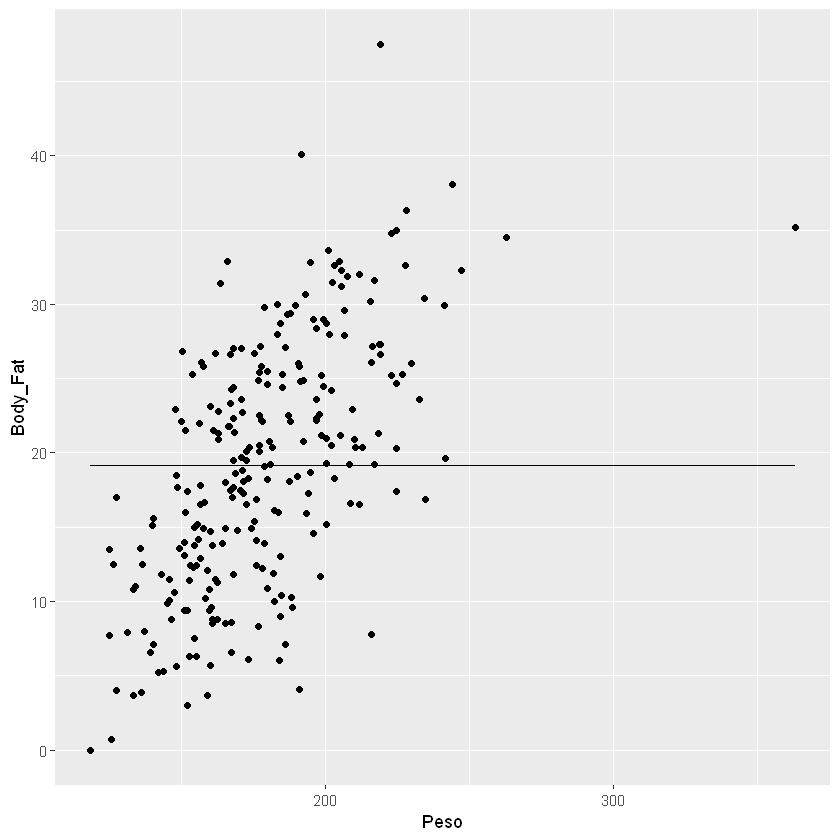

In [94]:
ggplot(bodyfat) + 
geom_point( aes(x = Peso, y = Body_Fat))+
geom_line( aes(x = Peso, y = media))

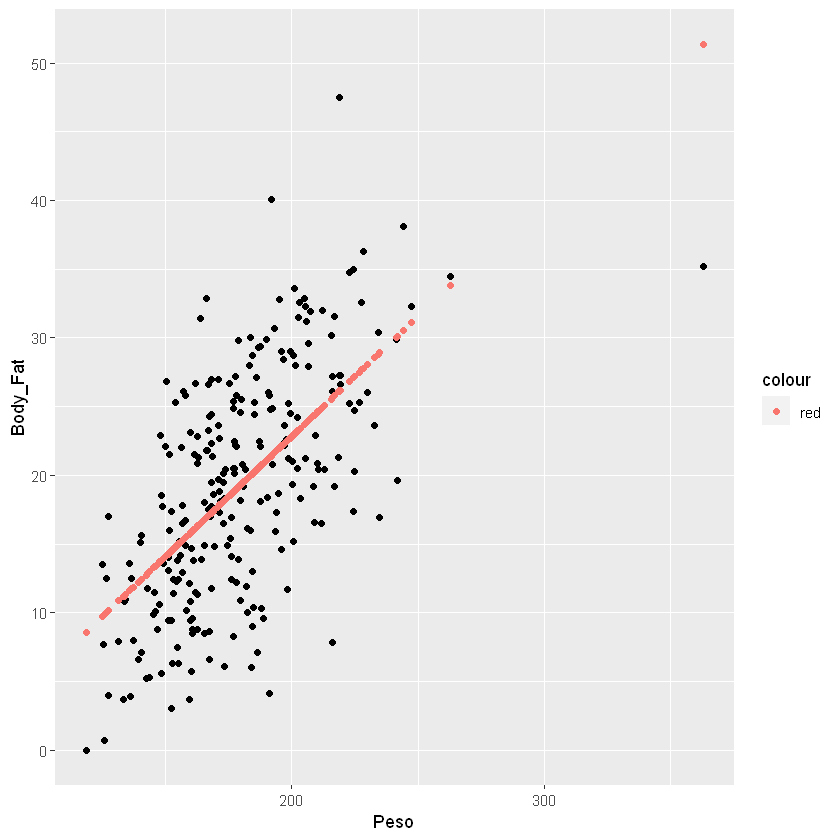

In [95]:
ggplot(bodyfat) + 
geom_point( aes(x = Peso, y = Body_Fat))+
geom_point( aes(x = Peso, y = predito_modelo1, color = 'red'))

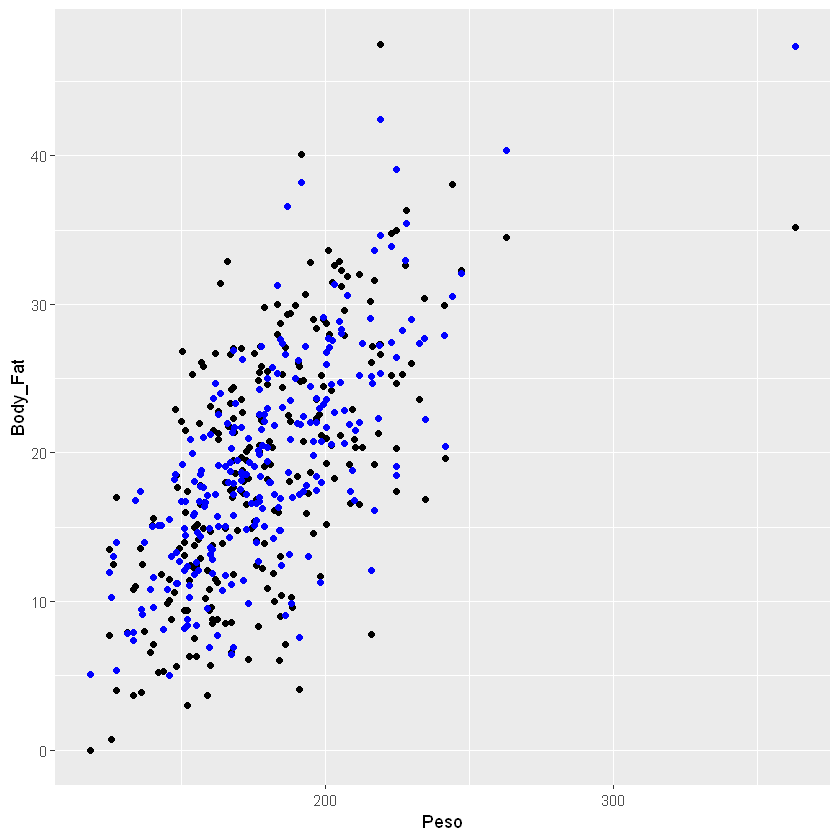

In [96]:
ggplot(bodyfat) + 
geom_point( aes(x = Peso, y = Body_Fat))+
geom_point( aes(x = Peso, y = predito_modelo2), color = 'blue')

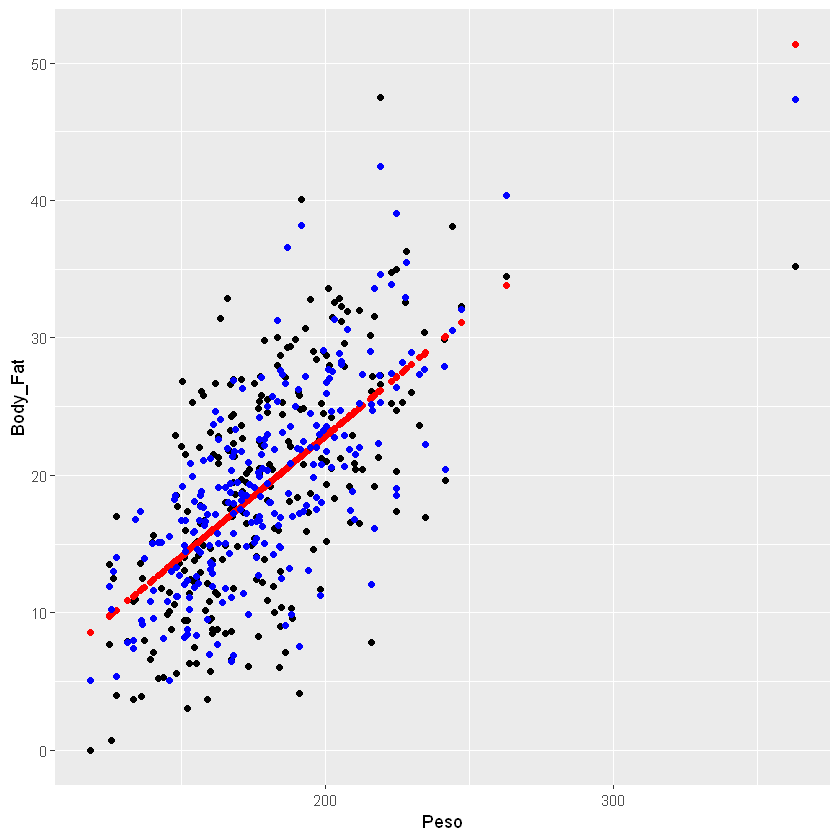

In [97]:
ggplot(bodyfat) + 
geom_point( aes(x = Peso, y = Body_Fat))+
geom_point( aes(x = Peso, y = predito_modelo1), color = 'red')+
geom_point( aes(x = Peso, y = predito_modelo2), color = 'blue')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



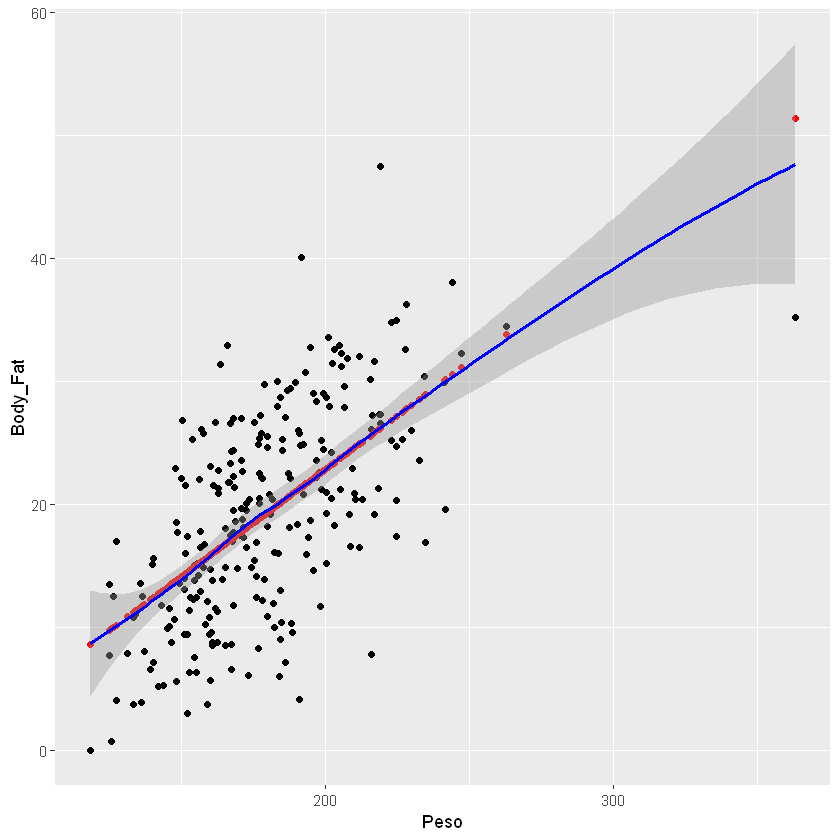

In [98]:
ggplot(bodyfat) + 
geom_point( aes(x = Peso, y = Body_Fat))+
geom_point( aes(x = Peso, y = predito_modelo1), color = 'red')+
geom_smooth( aes(x = Peso, y = predito_modelo2), color = 'blue')

In [99]:
bodyfat$dif1 = bodyfat$Body_Fat-bodyfat$predito_modelo1
bodyfat$dif2 = bodyfat$Body_Fat-bodyfat$predito_modelo2

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



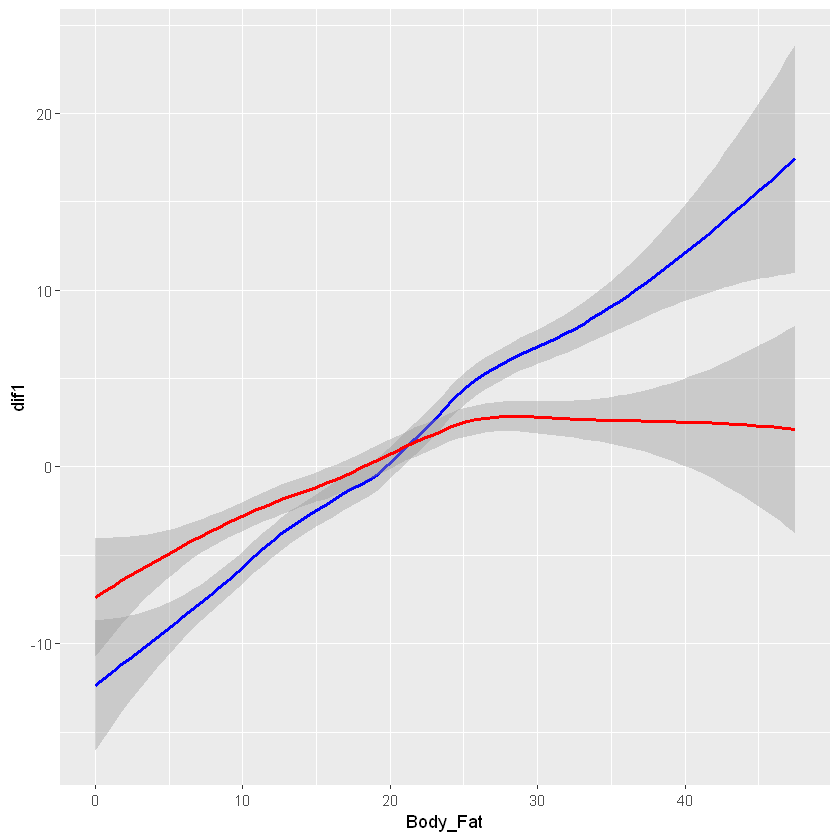

In [100]:
ggplot(bodyfat) + 
geom_smooth( aes(x = Body_Fat, y = dif1 ),color = 'blue')+
geom_smooth( aes(x = Body_Fat, y = dif2 ),color = 'red')

# ÁRVORE DE DECISÃO

Os modelos de árvore de decisão como vamos utilizar são implementados de acordo com o modelo Classification and Regression Trees de Breiman, Friedman, Olshen e Stone.

De certa forma, a árvore de decisão é o modelo mais intuitivo que existe, principalmente quando o objetivo é classificar uma observação em uma de duas classes. 

Considere que o seu objetivo é separar as observações azuis das observações laranjas no gráfico abaixo.

<img src=https://d33wubrfki0l68.cloudfront.net/5f90c583b81203dc61e91b8dcbe815e87cd54980/89203/material/modelagem/_index_files/figure-html/unnamed-chunk-11-1.png width="500">

# ÁRVORE DE DECISÃO

Pelo gráfico acima, podemos ver que a variável $x$ fornece informação que ajuda a discriminar se a observação será azul ou laranja. 

Basta ver que as observações de cor laranja estão mais concentradas do lado direito e as azuis, mais para o lado esquerdo. 

O objetivo da árvore de decisão é encontrar o valor de $x$ que melhor separa as informações azuis e laranja.

# EXEMPLO

Para esse exemplo vamos usar o banco de dados do Titanic. Um banco de dados que ficou famoso por causa de uma competição no Kaggle (https://www.kaggle.com/c/titanic). 

Esse banco de dados contém diversas informações sobre os passageiros do Titanic bem como uma variável que indica se o passageiro sobreviveu (1) e se não sobreviveu (0).

In [101]:
library(readr)
titanic <- read_csv('data/titanic_train.csv')


-- Column specification --------------------------------------------------------
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)




In [102]:
titanic$Survived <- as.factor(titanic$Survived)

In [103]:
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


Usaremos o pacote rpart que por sua vez possui uma função chamada rpart. A função rpart recebe uma fórmula indicando a variável resposta e as variáveis que serão utilizadas no modelo, além de receber um argumento data que indica o banco de dados utilizado.

In [104]:
install.packages('rpart')
install.packages('rpart.plot')

Warning message:
"package 'rpart' is in use and will not be installed"
Warning message:
"package 'rpart.plot' is in use and will not be installed"


In [105]:
library(rpart)
arvore <- rpart(Survived ~ Sex + Age + Pclass, data = titanic)

Assim como na regressão linear, podemos ver informações sobre o ajuste usando a função summary.

In [106]:
summary(arvore)

Call:
rpart(formula = Survived ~ Sex + Age + Pclass, data = titanic)
  n= 891 

          CP nsplit rel error    xerror       xstd
1 0.44444444      0 1.0000000 1.0000000 0.04244576
2 0.02339181      1 0.5555556 0.5555556 0.03574957
3 0.01461988      2 0.5321637 0.5614035 0.03588593
4 0.01169591      4 0.5029240 0.5614035 0.03588593
5 0.01000000      6 0.4795322 0.5380117 0.03533082

Variable importance
   Sex Pclass    Age 
    70     18     12 

Node number 1: 891 observations,    complexity param=0.4444444
  predicted class=0  expected loss=0.3838384  P(node) =1
    class counts:   549   342
   probabilities: 0.616 0.384 
  left son=2 (577 obs) right son=3 (314 obs)
  Primary splits:
      Sex    splits as  RL,       improve=124.426300, (0 missing)
      Pclass < 2.5  to the right, improve= 43.781830, (0 missing)
      Age    < 6.5  to the right, improve=  8.814172, (177 missing)

Node number 2: 577 observations,    complexity param=0.02339181
  predicted class=0  expected loss=0.18

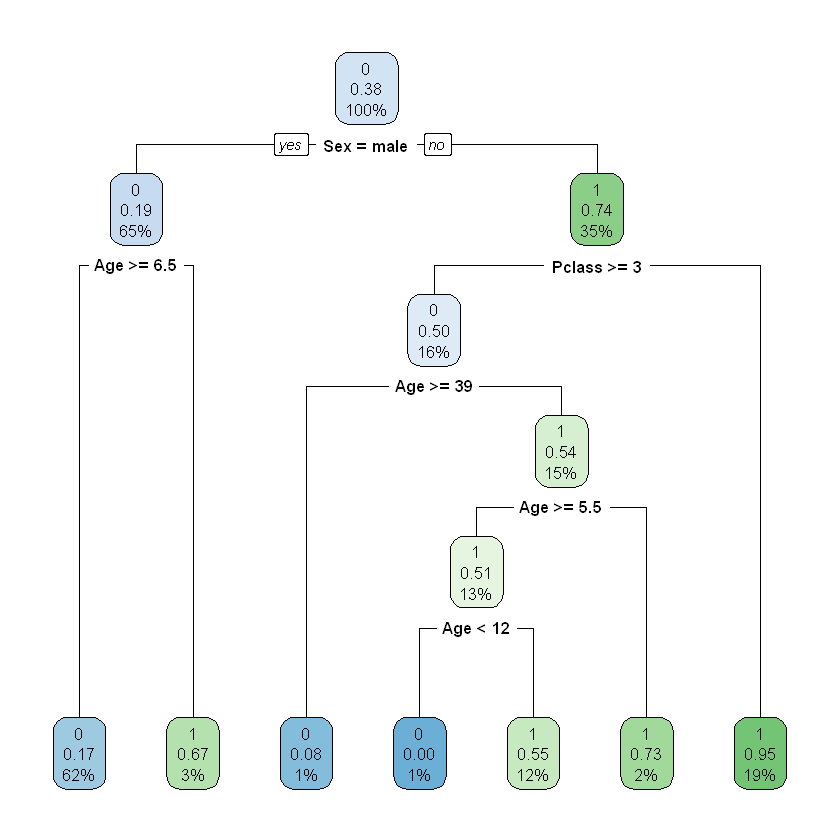

In [74]:
library(rpart.plot)
rpart.plot(arvore)

A visualização é bem intuitiva. 

No topo, vemos o primeiro nó em que 38% dos indivíduos sobreviveram e que representa o total da base (100%). 

Em seguida, vemos que a primeira variável que discrimina quem sobreviveu ou não é a variável Sexo: 
- Dos homens, que eram 65% dos passageiros, apenas 19% sobreviveu enquanto das mulheres, que eram 35%, 74% sobreviveu. 
- Dos homens, aqueles que eram menores de 6 anos e meio, sobreviveram em maior proporção também. 

A interpretação pode continuar dessa forma recursivamente.


Mais uma vez, assim como na regressão linear, podemos utilizar a função predict para obter a probabilidade predita de sobrevivência e a classificação predita para cada observação. 

A diferença é que agora temos o parâmetros type, que vai indicar se queremos a probabilidade ou a classe predita.

In [107]:
probabilidades <- predict(arvore, newdata = titanic, type = 'prob')

Com type = 'prob' obtemos uma matrix em que cada coluna representa a probabilidade predita para cada classe. 

Quando temos apenas um classe isso pode parecer desnecessário já que o valor de uma coluna é a diferença de 1 pelo valor da outra, mas árvores podem ser utilizadas em modelos com mais de classificação para mais de duas categorias.

In [108]:
head(probabilidades)

,0,1
1,0.83182640,0.1681736
2,0.05294118,0.9470588
3,0.44954128,0.5504587
4,0.05294118,0.9470588
5,0.83182640,0.1681736
6,0.83182640,0.1681736


Quando temos apenas um classe isso pode parecer desnecessário já que o valor de uma coluna é a diferença de 1 pelo valor da outra, mas árvores podem ser utilizadas em modelos com mais de classificação para mais de duas categorias.

In [109]:
classes <- predict(arvore, newdata = titanic, type = 'class')

In [79]:
head(classes)

1 2 3 4 5 6 
0 1 1 1 0 0 
Levels: 0 1